## Import Libraries

In [1]:
import sys

sys.path.append('/home/michele.prencipe/tesi/transformer/swin2sr')

import numpy as np
import matplotlib.pyplot as plt
import os

# Change working directory to where your project is located
os.chdir('/home/michele.prencipe/tesi/transformer/swin2sr')
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from data_loader.read_mrc import read_mrc
from skimage import io, color
from utils.utils import set_global_seed
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode
set_global_seed(42)

/home/michele.prencipe/environments/miniforge3/envs/transformer/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/home/michele.prencipe/environments/miniforge3/envs/transformer/lib/python3.9/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
print(sys.path)

['/home/michele.prencipe/tesi/transformer/swin2sr', '/home/michele.prencipe/environments/miniforge3/envs/transformer/lib/python39.zip', '/home/michele.prencipe/environments/miniforge3/envs/transformer/lib/python3.9', '/home/michele.prencipe/environments/miniforge3/envs/transformer/lib/python3.9/lib-dynload', '', '/home/michele.prencipe/environments/miniforge3/envs/transformer/lib/python3.9/site-packages', '/home/michele.prencipe/tesi/transformer/swin2sr', '/home/michele.prencipe/environments/miniforge3/envs/transformer/lib/python3.9/site-packages/setuptools/_vendor']


## Set Directories

In [3]:
from data_loader.biosr_dataset import BioSRDataLoader

# Define your working directory and data directory
work_dir = "."
tensorboard_log_dir = os.path.join(work_dir, "tensorboard_logs")
os.makedirs(tensorboard_log_dir, exist_ok=True)
data_dir = '/group/jug/ashesh/data/BioSR/'


## Load Data

In [4]:
#config = get_config()
#train_loader, val_loader, test_loader = create_dataset(config, transform=False, noisy_data=True, noisy_factor=0, gaus_factor=3400)

In [5]:
# # Crea la figura con 1 riga e 2 colonne
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# # Primo subplot
# ax1.imshow(dataset[0][0])
# ax1.set_title('Non-noisy')

# #Secondo subplot
# ax2.imshow(noisy_dataset[0][0])
# ax2.set_title('Noisy')
# # Mostra il grafico
# plt.tight_layout()  # Adatta il layout per evitare sovrapposizioni
# plt.show() 


## Create Model

### Swin2SR

In [6]:
from tests.training import Swin2SRModule
from configs.biosr_config import get_config
import json


# Automatically detect if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_directory = '/group/jug/Michele/training/2411/biosr/4'
config_fpath = os.path.join(model_directory,'config.json')
with open(config_fpath,'rb') as f:
    config = json.load(f)

# Initialize the model
model = Swin2SRModule(config)
print(model.parameters)
# Load the model checkpoint onto the selected device
checkpoint = torch.load(os.path.join(model_directory, '39vul4zaswin2sr_best.ckpt'), map_location=device, weights_only = True)

# Load the state dict from the checkpoint
model.load_state_dict(checkpoint['state_dict'])


<bound method Module.parameters of Swin2SRModule(
  (model): Swin2SR(
    (conv_first): Conv2d(1, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (patch_embed): PatchEmbed(
      (proj): Conv2d(144, 144, kernel_size=(1, 1), stride=(1, 1))
      (norm): LayerNorm((144,), eps=1e-05, elementwise_affine=True)
    )
    (patch_unembed): PatchUnEmbed()
    (pos_drop): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): RSTB(
        (residual_group): BasicLayer(
          dim=144, input_resolution=(256, 256), depth=4
          (blocks): ModuleList(
            (0): SwinTransformerBlock(
              dim=144, input_resolution=(256, 256), num_heads=3, window_size=16, shift_size=0, mlp_ratio=1.5
              (norm1): LayerNorm((144,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                dim=144, window_size=(16, 16), pretrained_window_size=(0, 0), num_heads=3
                (cpb_mlp): Sequential(
                  (0): Linear(i

<All keys matched successfully>

## Inference

In [7]:
# from torch import nn as nn
# # Validation loop (optional but recommended)
# model.eval()  # Set model to evaluation mode
# model = model.cuda()
# criterion = nn.MSELoss()
# val_loss = 0.0
# test_inputs = []
# test_outputs = []
# test_targets = []
# test_inputs_denormalized =[]
# test_outputs_denormalized=[]
# test_targets_denormalized = []

# c1_min, c1_max, c2_min, c2_max = test_loader.dataset.get_normalization_params() #of the entire dataset
# print(c1_max, c2_max, c1_min, c2_min)

# with torch.no_grad():
#     for inputs, targets in test_loader:
#         inputs, targets = inputs.cuda(), targets.cuda()                

#         # Ensure inputs and targets have the correct dimensions
#         if len(inputs.shape) == 3:  # If inputs are [batch_size, height, width]
#             inputs = inputs.unsqueeze(1)  # Add channel dimension to make it [batch_size, 1, height, width]
#         if len(targets.shape) == 3:  # If targets are [batch_size, height, width]
#             targets = targets.unsqueeze(1)  # Add channel dimension to make it [batch_size, 1, height, width]

#         outputs = model(inputs)  # Forward pass
#         loss = criterion(outputs, targets)  # Compute loss
        
#         val_loss += loss.item()  # Accumulate loss
        
        
#         targets[:,0,:,:] = targets[:,0,:,:]*(c1_max - c1_min) + c1_min
#         targets[:,1,:,:] = targets[:,1,:,:]*(c2_max - c2_min) + c2_min
#         outputs[:,0,:,:]  = outputs[:,0,:,:]*(c1_max - c1_min) + c1_min
#         outputs[:,1,:,:]  = outputs[:,1,:,:]*(c2_max - c2_min) + c2_min
        
        
#         test_inputs.append(inputs.cpu().numpy())
#         test_outputs.append(outputs.cpu().numpy())
#         test_targets.append(targets.cpu().numpy())        

#         # Ensure outputs and targets have the same dimensions for loss computation
#         if outputs.shape != targets.shape:
#             print(f"Output shape: {outputs.shape}, Target shape: {targets.shape}")
#             raise ValueError("Output and target shapes do not match!")       

# test_inputs = np.concatenate(test_inputs, axis=0)
# test_outputs = np.concatenate(test_outputs, axis=0)
# test_targets = np.concatenate(test_targets, axis=0)



# # Compute average validation loss for the epoch
# val_loss = val_loss / len(test_loader)
# print(f'Validation Loss: {val_loss:.9f}')


## Metric Calculation

In [8]:
# from collections import defaultdict
# from skimage.metrics import peak_signal_noise_ratio as psnr
# from skimage.metrics import structural_similarity as ssim
# from utils.util_calculate_psnr_ssim import calculate_psnr, calculate_ssim
# from core.psnr import PSNR

# psnr_arr = {0: [], 1: []}
# ssim_arr = defaultdict(list)


# for ch_idx in range(test_outputs.shape[1]):
#     if ch_idx == 0:
#         data_range = c1_max - c1_min
#     else: 
#         data_range = c2_max - c2_min
#     psnr_arr[ch_idx].append(PSNR(test_targets[:, ch_idx, :, :], test_outputs[:, ch_idx, : , : ], range_= data_range))
# print(psnr_arr)
# print("psnr channel 1:", np.mean(psnr_arr[0]))
# print("psnr channel 2:", np.mean(psnr_arr[1]))

## Visual Evaluation

In [9]:
# idx = 3
# print(f"Index: {idx}")
# img_sz = 3
# ncols = 3
# nrows = 2
# _, ax = plt.subplots(figsize=(img_sz*ncols, img_sz*nrows), ncols=ncols,nrows=nrows)
# ax[0,0].imshow(test_inputs[idx ,0])
# ax[0,1].imshow(test_outputs[idx, 0],vmin = test_targets[idx, 0].min())
# ax[0,2].imshow(test_targets[idx, 0])
# ax[1,1].imshow(test_outputs[idx,1], vmin = test_targets[idx, 1].min())
# ax[1,2].imshow(test_targets[idx,1])

# ax[0,0].set_title('Noisy Input')
# ax[0,1].set_title('Output')
# ax[0,2].set_title('Target')

## Stitching Predictions


In [10]:
data_type = 'biosr'
gauss_factor = 3400
poisson_factor = 0
noisy_data = True
patch_size = 256
tile_size = 128
data_shape = (5,1004,1004)

In [11]:
from predtiler.dataset import get_tiling_dataset, get_tile_manager
from data_loader.biosr_dataloader import SplitDataset

manager = get_tile_manager(data_shape=data_shape, tile_shape=(1,tile_size,tile_size), 
                               patch_shape=(1,patch_size,patch_size))

    
dset_class = get_tiling_dataset(SplitDataset, manager)
dataset = dset_class(           data_type = data_type,
                                patch_size=patch_size,
                                transform=None,
                                noisy_data=noisy_data,
                                noise_factor=poisson_factor, 
                                gaus_factor=gauss_factor,
                                mode = 'Test'
                                )
print(type(dataset))
test_loader = DataLoader(dataset, batch_size=2, shuffle=False, num_workers=4)
c1_min, c1_max, c2_min, c2_max = test_loader.dataset.get_normalization_params() #of the entire dataset

Norm Param:  -14368.707338868355 -17663.88874631998 69539.03901244627 68380.56516537277 94844.0 0.0
c1_data shape: (1004, 1004, 5)
c2_data shape: (1004, 1004, 5)
<class 'predtiler.dataset.get_tiling_dataset.<locals>.TilingDataset'>


In [12]:
print(manager)

TileIndexManager(data_shape=(5, 1004, 1004), grid_shape=(1, 128, 128), patch_shape=(1, 256, 256), tiling_mode=2)


In [13]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
else:
    print("CUDA is not available. Using CPU.")


CUDA is available. Using GPU.


In [14]:
from predtiler.tile_stitcher import stitch_predictions

predictions = []
targets = []
model = model.eval()
model = model.to(device)
inputs = []

for inp, targ in test_loader:
    inp, targ = inp.to(device), targ.to(device)
    if len(inp.shape) == 3:  
        inp = inp.unsqueeze(1)
    if len(targ.shape) == 3:
        targ = targ.unsqueeze(1)        
    pred = model(inp)
    
    
    pred[:,0,:,:] = pred[:,0,:,:]*(c1_max - c1_min) + c1_min
    pred[:,1,:,:] = pred[:,1,:,:]*(c2_max - c2_min) + c2_min
    
    predictions.append(pred.cpu().detach().numpy())
    
    
    targ[:,0,:,:] = targ[:,0,:,:]*(c1_max - c1_min) + c1_min
    targ[:,1,:,:] = targ[:,1,:,:]*(c2_max - c2_min) + c2_min
    
    inputs.append(inp.cpu().detach().numpy())
    targets.append(targ.cpu().detach().numpy())

inputs = np.concatenate(inputs, axis = 0)
predictions = np.concatenate(predictions, axis = 0) # shape: (number_of_patches, C, patch_size, patch_size)
stitched_pred = stitch_predictions(predictions, dataset.tile_manager)
targets = np.concatenate(targets, axis = 0)
print(targets.shape)
print(manager)
print(predictions.shape)
print(stitched_pred.shape)

[5, 1004, 1004, 2]
(245, 2, 256, 256)
TileIndexManager(data_shape=(5, 1004, 1004), grid_shape=(1, 128, 128), patch_shape=(1, 256, 256), tiling_mode=2)
(245, 2, 256, 256)
(5, 1004, 1004, 2)


In [15]:
from data_loader.biosr_no_patching import NoPatchingSplitDataset
dataset_no_patching = NoPatchingSplitDataset(
                              data_type=data_type,
                              transform=None,
                              noisy_data=noisy_data,
                              noise_factor= poisson_factor, 
                              gaus_factor= gauss_factor, mode = 'Test')


dataloader = DataLoader(dataset_no_patching, batch_size=2, shuffle=False, num_workers=4)
c1_min, c1_max, c2_min, c2_max = test_loader.dataset.get_normalization_params() #of the entire dataset

Norm Param:  -15248.37790007493 -18040.3669954546 73803.19634063654 69869.21334004184 94844.0 0.0
c1_data shape: (1004, 1004, 5)
c2_data shape: (1004, 1004, 5)


In [16]:
from predtiler.tile_stitcher import stitch_predictions

predictions = []
targets = []
inputs = []

for inp, targ in dataloader:
    inp, targ = inp.cuda(), targ.cuda()
    if len(inp.shape) == 3:  
        inp = inp.unsqueeze(1)
    if len(targ.shape) == 3:
        targ = targ.unsqueeze(1)        
    targ[:,0,:,:] = targ[:,0,:,:]*(c1_max - c1_min) + c1_min
    targ[:,1,:,:] = targ[:,1,:,:]*(c2_max - c2_min) + c2_min
    
    targets.append(targ.cpu().detach().numpy())
    inputs.append(inp.cpu().detach().numpy())
    
inputs = np.concatenate(inputs, axis = 0)
targets = np.concatenate(targets, axis = 0)
print(targets.shape)

(5, 2, 1004, 1004)


In [17]:
from collections import defaultdict
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from utils.util_calculate_psnr_ssim import calculate_psnr, calculate_ssim
from core.psnr import PSNR

psnr_arr = {0: [], 1: []}
for ch_idx in range(targets.shape[1]):
    if ch_idx == 0:
        data_range = c1_max - c1_min
        
    else: 
        data_range = c2_max - c2_min
    psnr_arr[ch_idx].append(PSNR(targets[:,ch_idx,:,:], stitched_pred[:,:,:,ch_idx], range_= data_range))

print(psnr_arr)
print("psnr channel 1:", np.mean(psnr_arr[0]))
print("psnr channel 2:", np.mean(psnr_arr[1]))


{0: [tensor([33.4909, 32.9739, 33.4443, 35.6162, 32.7634])], 1: [tensor([35.9291, 35.1775, 36.1037, 37.7838, 35.6776])]}
psnr channel 1: 33.65777
psnr channel 2: 36.13435


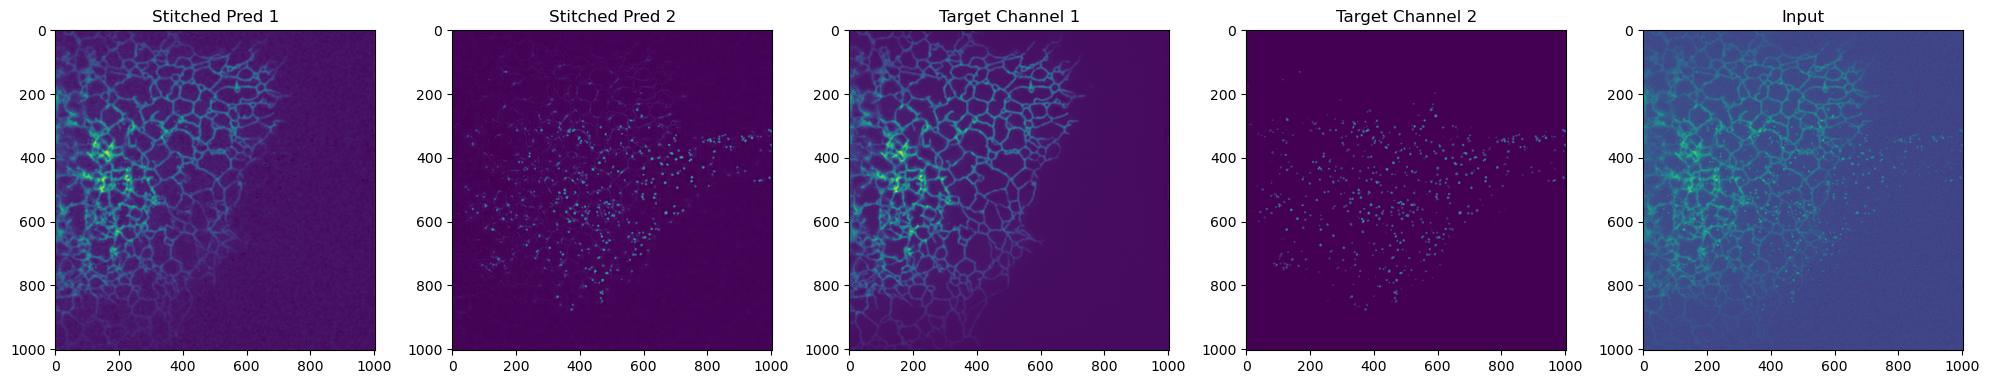

In [18]:
# Crea la figura con 1 riga e 2 colonne
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 10))  # 1 riga, 2 colonne

_, target = dataloader.dataset[0]


# Primo subplot
ax1.imshow(stitched_pred[0,:,:,0],vmin = targets[0,0,:,:].min())
ax1.set_title('Stitched Pred 1')

# Secondo subplot
ax2.imshow(stitched_pred[0,:,:,1],vmin = targets[0,1,:,:].min())
ax2.set_title('Stitched Pred 2')

# Secondo subplot
ax3.imshow(targets[0,0,:, :])
ax3.set_title('Target Channel 1')


# Secondo subplot
ax4.imshow(targets[0,1,:,:])
ax4.set_title('Target Channel 2')


# Secondo subplot
ax5.imshow(inputs[0,0,:,:])
ax5.set_title('Input')


# Mostra il grafico
plt.tight_layout()  # Adatta il layout per evitare sovrapposizioni
plt.show()

In [19]:
print(targets[:, 0, :, :].max())
print(stitched_pred[:, 0,:, :].max())
print(targets[:, 0, :, :].min())
print(stitched_pred[:, 0,:, :].min())

61748.434
35969.848
-1.1113281
-6041.157


In [20]:
directory = '/group/jug/ashesh/TrainValTestSplit/hagen'
val = np.load(os.path.join(directory, 'val_data.npy'), allow_pickle=True)
print(val.shape)
train = np.load(os.path.join(directory, 'train_data.npy'), allow_pickle=True)
print(train.shape)
print(train.min(), val.min(), train.max(), val.max())

(10, 2048, 2048, 2)
(80, 2048, 2048, 2)
22.0 38.0 40148.0 7940.0


In [21]:
percentile = np.percentile(train, 99.5)
clipped = np.clip(train, None, percentile)

In [22]:
print(1e-3)

0.001


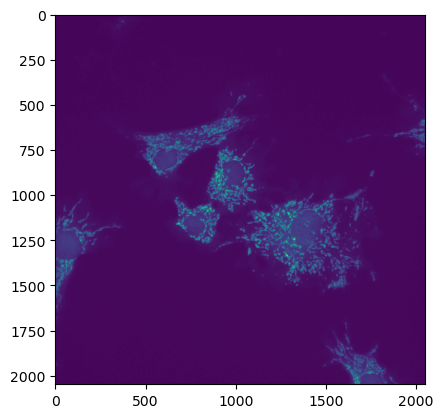

In [23]:
plt.imshow(train[0,:,:,1])

In [24]:
print()